In [1]:
%load_ext autoreload
import bpy
import numpy as np
import sys
import clipboard
from collections import defaultdict
from PIL import Image
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

In [2]:
import cProfile
import IPython.display as dp
from pstats import Stats

# pip install gprof2dot

def profile(exec_code):
    cProfile.run(exec_code, filename='/tmp/cprof.pstats')
    !gprof2dot -f pstats /tmp/cprof.pstats | dot -Tpng -o /tmp/output.png
    return dp.Image(filename='/tmp/output.png')

In [3]:
import bpy
import sys
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

from Logic.bpy_connector import *

clean_scene()
set_for_texture_generation()

Info: Deleted 6 data-block(s)


In [4]:
%autoreload 2
from Logic.bpy_connector import clean_scene, set_for_texture_generation, settings_for_texture_generation, NodesAdder
from Logic.network_manager import NetworkManager, ParamRequestType

In [5]:
path = '/Users/orenm/Desktop/test.png'

In [6]:
base_code = """
import bpy
import sys
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

from Logic.bpy_connector import clean_scene, set_for_texture_generation, settings_for_texture_generation, NodesAdder

path = '/Users/orenm/Desktop/test.png'
clean_scene()
set_for_texture_generation()
settings_for_texture_generation(path = path, resolution=512)

material = bpy.data.materials.new(name='my_material')
material.use_nodes = True
bpy.data.objects['Plane'].data.materials.append(material)
nodes = material.node_tree.nodes
links = material.node_tree.links
[nodes.remove(n) for n in nodes]
node_tree = material.node_tree
nodes_adder = NodesAdder(material.node_tree)
"""

In [7]:
clean_scene()
set_for_texture_generation()
settings_for_texture_generation(path = path, resolution=512)

material = bpy.data.materials.new(name='my_material')
material.use_nodes = True
bpy.data.objects['Plane'].data.materials.append(material)
nodes = material.node_tree.nodes
links = material.node_tree.links
[nodes.remove(n) for n in nodes]
node_tree = material.node_tree
nodes_adder = NodesAdder(material.node_tree)

Info: Deleted 2 data-block(s)


In [54]:
nm = NetworkManager()
nm.initialize_network()
nm.generate_random_network(n_additions=5)

rand_params = nm.get_random_param_values(ParamRequestType.NON_VECTOR_INPUT)
nm.set_nodes_attributes(rand_params)

In [55]:
# generating by order of layer, so output is last
layers = defaultdict(list)
for node_name, data in nm.network.nodes(data=True):
    layers[data['layer']].append(node_name)

code = ""
for i in range(max(layers), 0, -1):
    for node_name in layers[i]:
        node_instance = nm.to_node_instance(node_name)
        code += node_instance.to_code("nodes_adder.create_node")

for out1, in2, data in nm.network.edges(data=True):
    input_mapping = nm.names_to_types[in2].INPUT_MAPPING
    code += f"\nnode_tree.links.new({out1}.outputs['{data['out']}'], {in2}.inputs[{input_mapping[data['in']]}])"

In [56]:
print(code)
clipboard.copy(base_code+code)


input_coor = nodes_adder.create_node("ShaderNodeTexCoord")
InputNode = nodes_adder.create_node("ShaderNodeMapping")
InputNode.inputs["Rotation"].default_value[2] = 372.7191906310179
node_tree.links.new(input_coor.outputs["Object"], InputNode.inputs["Vector"])
ValToRGB_1 = nodes_adder.create_node("ShaderNodeValToRGB")
ValToRGB_1.inputs[0].default_value = -9.16549134912823
ValToRGB_1.color_ramp.elements[0].position = 0.47792132159265177
ValToRGB_1.color_ramp.elements[1].position = 0.430215488819091
TexVoronoiF_1 = nodes_adder.create_node("ShaderNodeTexVoronoi", distance = 'CHEBYCHEV', voronoi_dimensions="4D")
TexVoronoiF_1.inputs["W"].default_value = 301.1297925463243
TexVoronoiF_1.inputs["Scale"].default_value = 3.3725523610000296
TexVoronoiF_1.inputs["Randomness"].default_value = 0.5290474080698373
TexVoronoiF_2 = nodes_adder.create_node("ShaderNodeTexVoronoi", distance = 'EUCLIDEAN', voronoi_dimensions="4D")
TexVoronoiF_2.inputs["W"].default_value = 123.11225746967335
TexVoronoiF_2.i

In [57]:
exec(base_code+code)

Info: Deleted 3 data-block(s)


In [58]:
bpy.ops.render.render(write_still=True)

{'FINISHED'}

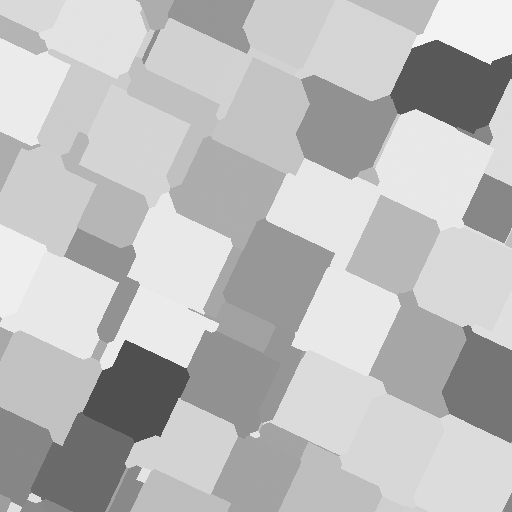

In [59]:
img = Image.open(path) 
img

In [41]:
img_array = np.array(img)